## Loading data

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Loading data
df = pd.read_csv("data/final_dataset.csv")

## Showing data

In [2]:
df.tail(5)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6075,6075,2016-05-15,Stoke,West Ham,2,1,H,39,64,54,...,0,0,0,0,0,-0.394737,0.394737,-0.368421,-0.236842,-3.0
6076,6076,2016-05-15,Swansea,Man City,1,1,NH,41,70,51,...,0,0,0,0,0,-0.263158,0.789474,-0.500000,0.026316,6.0
6077,6077,2016-05-15,Watford,Sunderland,2,2,NH,38,46,48,...,0,0,0,0,0,-0.263158,-0.368421,0.157895,-0.131579,2.0
6078,6078,2016-05-15,West Brom,Liverpool,1,1,NH,33,62,47,...,0,0,0,0,0,-0.368421,0.342105,-0.447368,-0.157895,7.0
6079,6079,2016-05-17,Man United,Bournemouth,3,1,H,46,44,34,...,0,0,0,0,0,0.315789,-0.526316,0.552632,0.157895,-14.0


## Checking for null values

In [3]:
df.isnull().values.any()

False

## Checking for feature correlations
Function to visualize correlated features. The closer to yellow, the more correlated.

In [4]:
def plot_corr(df, size=14):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

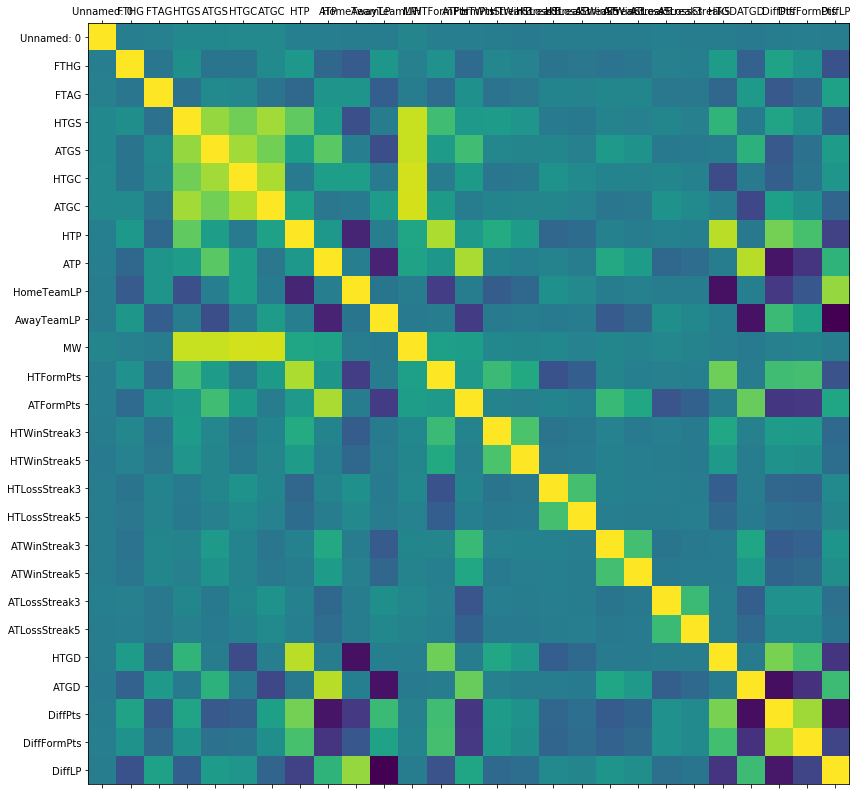

In [5]:
plot_corr(df)

## Cleaning data
I want to get rid of some of the most correlated features along with irrelevant ones 

In [6]:
del df['Unnamed: 0']
del df['MW']
del df['Date']
del df['HomeTeam']
del df['AwayTeam']

del df['HTFormPtsStr']
del df['ATFormPtsStr']
del df['HM1']
del df['HM2']
del df['HM3']
del df['HM4']
del df['HM5']
del df['AM1']
del df['AM2']
del df['AM3']
del df['AM4']
del df['AM5']


## Reviewing after cleaning
Some of the correlations are removed. Further work should be done to remove more correlated feautres in a real world case. 

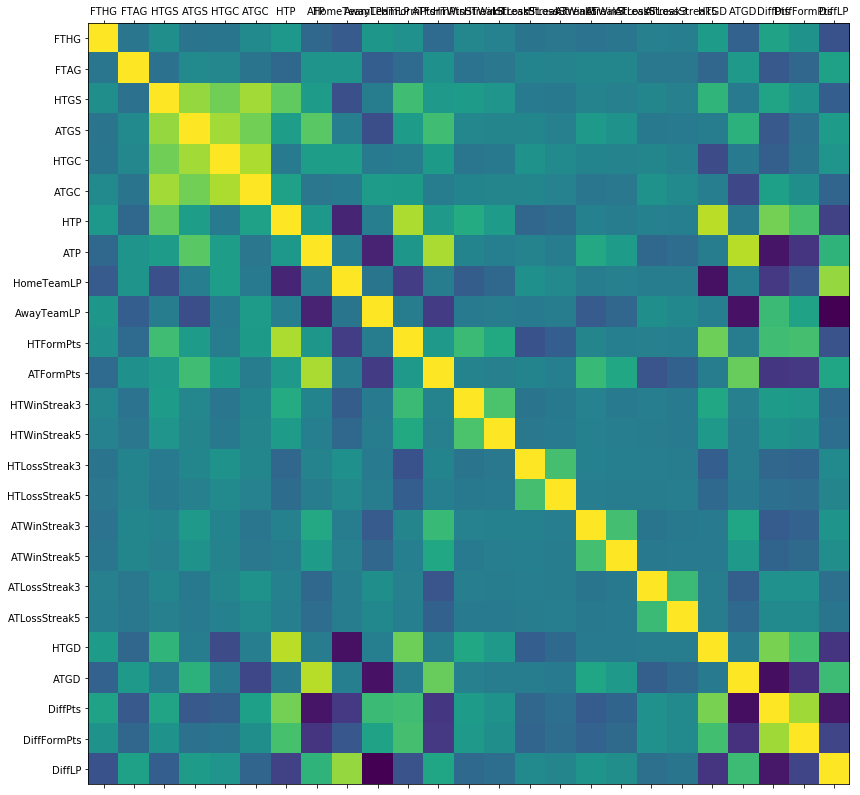

In [7]:
plot_corr(df)

## Preparing data
Setting the FTR-values (Full Time Result) to H, D or A depending on the Home goals and Away goals in each match.

In [8]:
for index, row in df.iterrows():
    hg = row['FTHG']
    ag = row['FTAG']
    ftr = 'D'
    
    if hg > ag:
        ftr = 'H'
    elif hg < ag:
        ftr = 'A'
        
    df.at[index,'FTR'] = ftr    
    

## Reviewing data
Checking that FTR-values are changed due to the home- and away goals

In [9]:
df.tail(5)

,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HomeTeamLP,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6075,2,1,H,39,64,54,49,1.263158,1.631579,9.0,...,0,0,0,0,0,-0.394737,0.394737,-0.368421,-0.236842,-3.0
6076,1,1,D,41,70,51,40,1.210526,1.710526,8.0,...,0,0,0,0,0,-0.263158,0.789474,-0.500000,0.026316,6.0
6077,2,2,D,38,46,48,60,1.157895,1.000000,18.0,...,0,0,0,0,0,-0.263158,-0.368421,0.157895,-0.131579,2.0
6078,1,1,D,33,62,47,49,1.105263,1.552632,13.0,...,0,0,0,0,0,-0.368421,0.342105,-0.447368,-0.157895,7.0
6079,3,1,H,46,44,34,64,1.657895,1.105263,4.0,...,0,0,0,0,0,0.315789,-0.526316,0.552632,0.157895,-14.0


In [10]:
homewins = len(df.loc[df['FTR'] == 'H'])
print("Number of home wins:  {0} ({1:2.2f}%)".format(homewins, (homewins/len(df)) * 100))

Number of home wins:  2816 (46.32%)


## Splitting and preprocessing
Using 70% of the data for training and 30% for test.
The features are preprocessed to get normalized values.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = df.values #returns a numpy array

# HTP - Home team avg points
# ATP - Away team avg points

# Adding feature columns
feature_columns = ['HTP', 'ATP', 'HTFormPts', 'ATFormPts', 'DiffFormPts']
outcome_columns = ['FTR']

x = df[feature_columns].values
y = df[outcome_columns].values

# Preprocessing feature values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=split_test_size, random_state=28)


## Checking that the splitting is done correctly

In [12]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


## Checking that there are approximately the same ratio of homewins in test and training

In [13]:
print("Original Homewins  : {0} ({1:0.2f}%)".format(len(df.loc[df['FTR'] == 'H']), (len(df.loc[df['FTR'] == 'H'])/len(df.index)) * 100.0))
print("")
print("Training Homewins  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'H']), (len(y_train[y_train[:] == 'H'])/len(y_train) * 100.0)))
print("")
print("Test Homewins      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'H']), (len(y_test[y_test[:] == 'H'])/len(y_test) * 100.0)))

Original Homewins  : 2816 (46.32%)

Training Homewins  : 1967 (46.22%)

Test Homewins      : 849 (46.55%)


## Run training
Gaussian Naive Bayes, Random Forest, Logistic Regression and SVM are used to compare the results

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=28)
lr_model = LogisticRegression(C=0.7, random_state=28)
svm_model = svm.SVC()


nb_model.fit(x_train, y_train.ravel())
rf_model.fit(x_train, y_train.ravel())
lr_model.fit(x_train, y_train.ravel())
svm_model.fit(x_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Checking training data performance 

In [18]:
# import the performance metrics library
from sklearn import metrics

# predict values using the training data
nb_predict_train = nb_model.predict(x_train)
rf_predict_train = rf_model.predict(x_train)
lr_predict_train = lr_model.predict(x_train)
svm_predict_train = svm_model.predict(x_train)

# Print accuracy
print("Accuracy NB: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("Accuracy RF: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Accuracy LR: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("Accuracy SVM: {0:.4f}".format(metrics.accuracy_score(y_train, svm_predict_train)))

Accuracy NB: 0.5040
Accuracy RF: 0.9218
Accuracy LR: 0.5125
Accuracy SVM: 0.5120


### Checking test data performance

In [19]:
# predict values using the testing data
nb_predict_test = nb_model.predict(x_test)
rf_predict_test = rf_model.predict(x_test)
lr_predict_test = lr_model.predict(x_test)
svm_predict_test = svm_model.predict(x_test)

# Print accuracy
print("Accuracy NB: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print("Accuracy RF: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print("Accuracy LR: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("Accuracy SVM: {0:.4f}".format(metrics.accuracy_score(y_test, svm_predict_test)))


Accuracy NB: 0.4962
Accuracy RF: 0.4457
Accuracy LR: 0.5071
Accuracy SVM: 0.5115


### Checking feature importance
To see if some features can be removed in the next stage

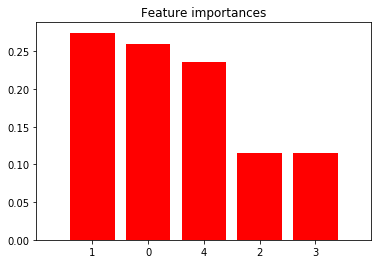

['HTP', 'ATP', 'HTFormPts', 'ATFormPts', 'DiffFormPts']
[ 0.26018447  0.27483529  0.11511614  0.11453469  0.23532941]


In [48]:
# Feature Importance

indices = np.argsort(rf_model.feature_importances_)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), rf_model.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

# display the relative importance of each attribute
print(feature_columns)
print(rf_model.feature_importances_)